# MALARIA

In [2]:
import pandas as pd
import seaborn as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [3]:
malaria = pd.read_csv('Dataset/final_malaria.csv')
malaria.head()

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,NaN,1.310160e+12,NaN,34.0,Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1.000000e+15,Y,1.000000e+15,K04HEM20123774,Negative
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310130e+12,NaN,43.0,Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1.000000e+15,Y,1.000000e+15,K04HEM18160758,Negative
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310130e+12,NaN,43.0,Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1.000000e+15,Y,1.000000e+15,K04HEM18160758,Negative
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,NaN,4.220140e+12,NaN,28.0,Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1.000000e+15,Y,1.000000e+15,K04HEM17056995,Negative
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,NaN,1.310110e+12,NaN,42.0,Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1.000000e+15,Y,1.000000e+15,K04HEM17073233,Negative


In [4]:
malaria.drop(['Unnamed: 0'], axis=1)


,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,NaN,1.310160e+12,NaN,34.0,Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1.000000e+15,Y,1.000000e+15,K04HEM20123774,Negative
1,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310130e+12,NaN,43.0,Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1.000000e+15,Y,1.000000e+15,K04HEM18160758,Negative
2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310130e+12,NaN,43.0,Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1.000000e+15,Y,1.000000e+15,K04HEM18160758,Negative
3,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,NaN,4.220140e+12,NaN,28.0,Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1.000000e+15,Y,1.000000e+15,K04HEM17056995,Negative
4,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,NaN,1.310110e+12,NaN,42.0,Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1.000000e+15,Y,1.000000e+15,K04HEM17073233,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,NaN,8.139494e+10,NaN,13.0,Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21017730,Negative
22912,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,NaN,NaN,NaN,20.0,Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21018207,Negative
22913,K04HEM21019179,K0400002461645,M Umer,M JUNAID,NaN,NaN,NaN,21.0,Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21019179,Negative
22914,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,NaN,M SALEEM,NaN,NaN,45.0,Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21021055,Negative


In [5]:
malaria.drop_duplicates()

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,NaN,1.310160e+12,NaN,34.0,Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1.000000e+15,Y,1.000000e+15,K04HEM20123774,Negative
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310130e+12,NaN,43.0,Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1.000000e+15,Y,1.000000e+15,K04HEM18160758,Negative
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310130e+12,NaN,43.0,Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1.000000e+15,Y,1.000000e+15,K04HEM18160758,Negative
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,NaN,4.220140e+12,NaN,28.0,Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1.000000e+15,Y,1.000000e+15,K04HEM17056995,Negative
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,NaN,1.310110e+12,NaN,42.0,Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1.000000e+15,Y,1.000000e+15,K04HEM17073233,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,22912,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,NaN,8.139494e+10,NaN,13.0,Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21017730,Negative
22912,22913,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,NaN,NaN,NaN,20.0,Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21018207,Negative
22913,22914,K04HEM21019179,K0400002461645,M Umer,M JUNAID,NaN,NaN,NaN,21.0,Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21019179,Negative
22914,22915,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,NaN,M SALEEM,NaN,NaN,45.0,Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1.000000e+15,Y,1.000000e+15,K04HEM21021055,Negative


## DATA CLEANING

In [6]:
malaria['DISTRICT'].fillna(malaria['DISTRICT'].mode()[0], inplace = True)
malaria['AGE'].fillna(malaria['AGE'].median(), inplace = True)
malaria['REPORT_VERIFIED'].fillna(malaria['REPORT_VERIFIED'].mode()[0], inplace = True)
malaria['TEHSIL'].fillna(malaria['TEHSIL'].mode()[0], inplace = True)

## DATA BALANCING

Negative    99.301798
Positive     0.698202
Name: RESULT_TEXT, dtype: float64


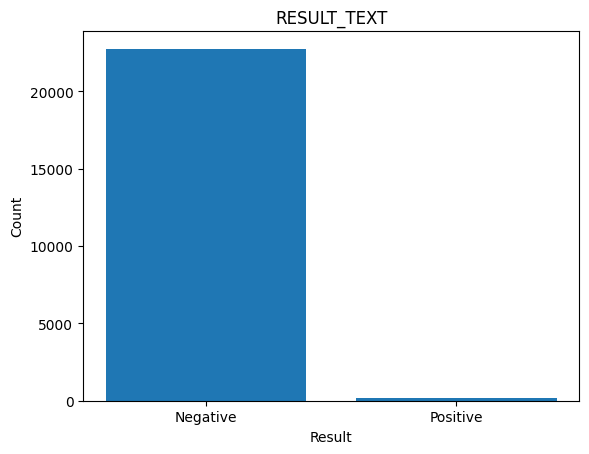

In [7]:
#Class Distribution
class_counts_typ = malaria['RESULT_TEXT'].value_counts()

class_distribution_typ =class_counts_typ / len(malaria) *100

print(class_distribution_typ)

#plot a bar graph
value = malaria['RESULT_TEXT'].value_counts()

plt.bar(value.index, value.values)

plt.title('RESULT_TEXT')
plt.xlabel('Result')
plt.ylabel('Count')

plt.show()

Negative    50.0
Positive    50.0
Name: RESULT_TEXT, dtype: float64


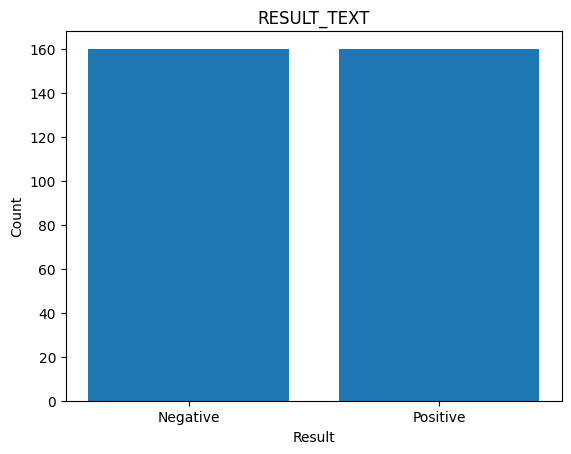

In [8]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
x = malaria.drop('RESULT_TEXT', axis=1)
y = malaria['RESULT_TEXT']

# Undersample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

# Concatenate the features and target into balanced dataset
balanced_data = pd.concat([x_resampled, y_resampled], axis=1)

balanced_data.to_csv('new_copy2/Balanced_Malaria.csv', index = False)

Balanced_malaria = pd.read_csv('new_copy2/Balanced_Malaria.csv')

#Class Distribution
class_counts_typ = Balanced_malaria['RESULT_TEXT'].value_counts()

class_distribution_typ =class_counts_typ / len(Balanced_malaria) *100

print(class_distribution_typ)

#plot a bar graph
value = Balanced_malaria['RESULT_TEXT'].value_counts()

plt.bar(value.index, value.values)

plt.title('RESULT_TEXT')
plt.xlabel('Result')
plt.ylabel('Count')

plt.show()

In [9]:
Balanced_malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       320 non-null    int64  
 1   SECTION_NO       320 non-null    object 
 2   MRNO             320 non-null    object 
 3   PATIENT_NAME     320 non-null    object 
 4   FATHER_NAME      218 non-null    object 
 5   HUSBAND_NAME     45 non-null     object 
 6   NIC_NEW          127 non-null    float64
 7   REFERRED_FROM    0 non-null      float64
 8   AGE              320 non-null    float64
 9   GENDER           320 non-null    object 
 10  NO_OF_ADMISSION  320 non-null    int64  
 11  DISTRICT         320 non-null    object 
 12  TEHSIL           320 non-null    object 
 13  REPORT_VERIFIED  320 non-null    object 
 14  CPT_ID           320 non-null    float64
 15  RESULT_VALUE     320 non-null    object 
 16  CPT_ID.1         320 non-null    float64
 17  SECTION_NO.1    

## DATA TRANSFORMATION

In [10]:
le = LabelEncoder()
Balanced_malaria["MRNO_encoded"] = le.fit_transform(Balanced_malaria["MRNO"])
Balanced_malaria["RESULT_VALUE_encoded"] = le.fit_transform(Balanced_malaria["RESULT_VALUE"])
Balanced_malaria["GENDER_encoded"] = le.fit_transform(Balanced_malaria["GENDER"])
Balanced_malaria["REPORT_VERIFIED_encoded"] = le.fit_transform(Balanced_malaria["REPORT_VERIFIED"])
Balanced_malaria["RESULT_TEXT_encoded"] = le.fit_transform(Balanced_malaria["RESULT_TEXT"])
# One-hot encode District and Tehsil
ohe = OneHotEncoder(sparse=False)
district_tehsil_encoded = ohe.fit_transform(Balanced_malaria[["DISTRICT", "TEHSIL"]])
district_tehsil_encoded_df = pd.DataFrame(district_tehsil_encoded, columns=ohe.get_feature_names_out(["DISTRICT", "TEHSIL"]))

# Combine the encoded columns with the original dataset
new_df = pd.concat([Balanced_malaria["MRNO_encoded"], district_tehsil_encoded_df], axis=1)
new_df["AGE"] = Balanced_malaria["AGE"]
new_df["RESULT_TEXT"] = Balanced_malaria["RESULT_TEXT_encoded"]
new_df["GENDER"] = Balanced_malaria["GENDER_encoded"]
new_df["RESULT_VALUE"] = Balanced_malaria["RESULT_VALUE_encoded"]
new_df["REPORT_VERIFIED"] = Balanced_malaria["REPORT_VERIFIED_encoded"]
new_df["CPT_ID"] = Balanced_malaria["CPT_ID"]
new_df["CPT_ID.1"] = Balanced_malaria["CPT_ID.1"]
# Save the new dataframe to a new CSV file
new_df.to_csv('new_copy2/New_Malaria.csv', index = False)

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
print(Balanced_malaria['MRNO_encoded'])

0      109
1      223
2      139
3      135
4      229
      ... 
315    148
316    155
317    162
318    165
319    202
Name: MRNO_encoded, Length: 320, dtype: int32


## DATA NORMALISATION

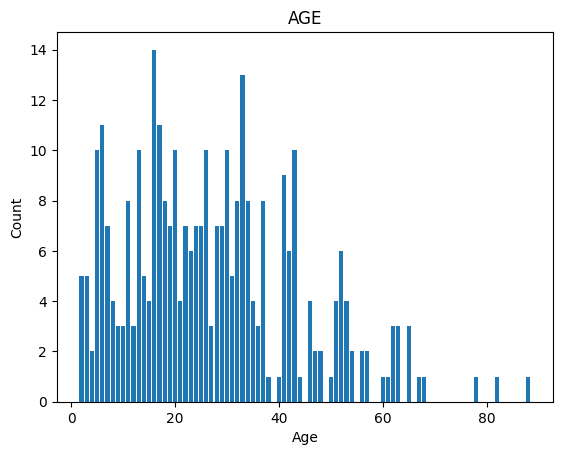

In [12]:
value = Balanced_malaria['AGE'].value_counts()

plt.bar(value.index, value.values)

plt.title('AGE')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [13]:
Transformed_malaria = pd.read_csv('new_copy2/New_Malaria.csv', low_memory = False)
# Column to be normalized
column = ['AGE']

Transformed_malaria[column] = (Transformed_malaria[column] - Transformed_malaria[column].mean()) / Transformed_malaria[column].std()

# New .csv file with normalized data
Transformed_malaria.to_csv('new_copy2/Normalized_Malaria.csv', index = False)# Column to be normalized
column = ['AGE']

Transformed_malaria[column] = (Transformed_malaria[column] - Transformed_malaria[column].mean()) / Transformed_malaria[column].std()

# New .csv file with normalized data
Transformed_malaria.to_csv('new_copy2/Normalized_Malaria.csv', index = False)

0    1.503213
1    1.563850
2    0.229850
3   -0.315878
4    0.836213
Name: AGE, dtype: float64


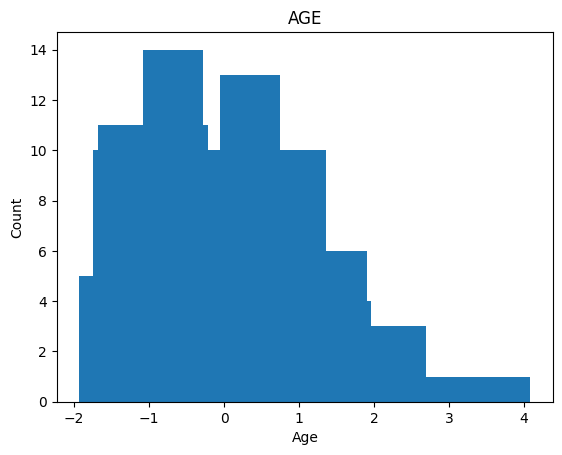

In [14]:
Normal_malaria = pd.read_csv('new_copy2/Normalized_Malaria.csv', low_memory = False)
print(Normal_malaria['AGE'].head())

value = Normal_malaria['AGE'].value_counts()

plt.bar(value.index, value.values)

plt.title('AGE')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

## RANDOM FOREST FEATURE SELECTION

In [15]:
# Drop rows with missing data
Normal_malaria.dropna(inplace=True)

# Split the data into feature matrix X and target vector y
X = Normal_malaria.drop('RESULT_TEXT', axis=1)
y = Normal_malaria['RESULT_TEXT']

In [16]:
# Use random forest to select the most important features
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y)
importance = rfc.feature_importances_

In [17]:
# Create a list of (feature name, importance) tuples and sort by importance
features = list(zip(X.columns, importance))
features.sort(key=lambda x: x[1], reverse=True)

# Print the sorted list of feature importances
for f in features:
    print(f)


# Select the top k features
k = 7
top_features = [f[0] for f in features[:k]]
for f in top_features:
    print(f)
X = X[top_features]

('MRNO_encoded', 0.2920250970525857)
('REPORT_VERIFIED', 0.2530602087685441)
('AGE', 0.24103979194295624)
('DISTRICT_Abbottabad', 0.0492958219720036)
('TEHSIL_Abbottabad', 0.03384598671773106)
('GENDER', 0.03162978917973561)
('DISTRICT_Mansehra', 0.0171253314643199)
('DISTRICT_Kohistan', 0.011619542676210357)
('RESULT_VALUE', 0.008411809743513347)
('TEHSIL_Mansehra', 0.007168624061825606)
('TEHSIL_Balakot', 0.006364410902939838)
('DISTRICT_Batgram', 0.004627801569535668)
('DISTRICT_GILGIT', 0.004527865412775369)
('TEHSIL_Batagram', 0.004497432340673081)
('TEHSIL_Oghi', 0.004344937748610513)
('TEHSIL_GILGIT', 0.004007554751921517)
('DISTRICT_Haripur', 0.0034139161648465105)
('TEHSIL_CHILAS', 0.0030179830360817016)
('DISTRICT_Shangla', 0.0029648829345272024)
('DISTRICT_DIAMIR', 0.0028317562310008694)
('TEHSIL_Dassu', 0.002602369264223744)
('TEHSIL_Alpuri', 0.002532452283162439)
('TEHSIL_Palas', 0.0021887141510236767)
('TEHSIL_havelia', 0.0021761690508639558)
('TEHSIL_Haripur', 0.00214344

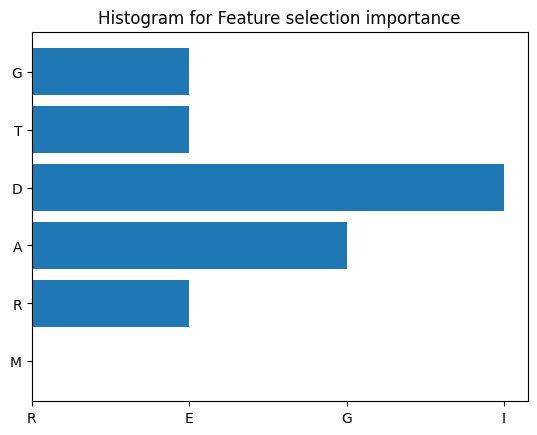

In [18]:
plt.title("Histogram for Feature selection importance");
plt.barh([x[0] for x in top_features],[x[1] for x in top_features])
plt.show()

## RANDOM FOREST CLASSIFIER

In [18]:
# Train and evaluate the model using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [19]:
accuracy_scores = []
y_preds=[]
y_tests=[]
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the random forest classifier
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)

    # Make predictions on the test set and calculate accuracy
    y_pred = rfc.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Add accuracy score to list
    accuracy_scores.append(accuracy)

In [20]:
# Compute and print the mean accuracy score and standard deviation
print("Accuracy- Random forest classifier: %0.2f (+/- %0.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))

Accuracy- Random forest classifier: 0.79 (+/- 0.11)


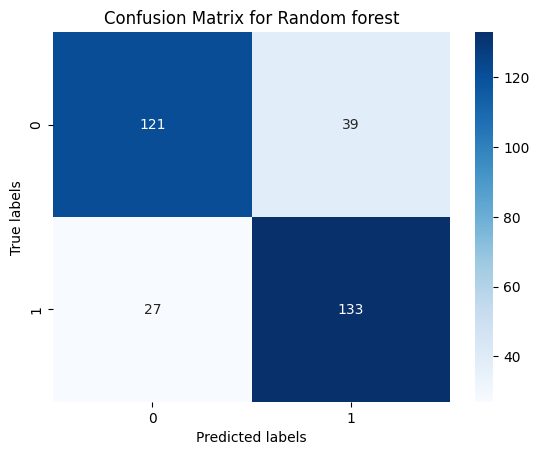

In [21]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_tests, y_preds)

# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues", fmt = 'd')

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Random forest")
plt.show()

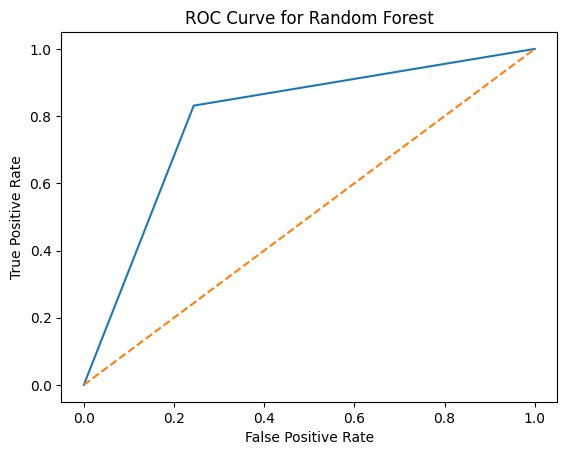

In [22]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_tests, y_preds)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

## KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
# Perform K-fold cross-validation and evaluate the model's performance
y_true = []
y_pred = []
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    knn.fit(X_train, y_train)
    y_true.extend(y_test)
    y_pred.extend(knn.predict(X_test))

In [27]:
accuracy = accuracy_score(y_true, y_pred)
# Add accuracy score to list
accuracy_scores.append(accuracy)
# Compute and print the mean accuracy score and standard deviation
print("Accuracy- KNN: %0.2f (+/- %0.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))

Accuracy- KNN: 0.60 (+/- 0.00)


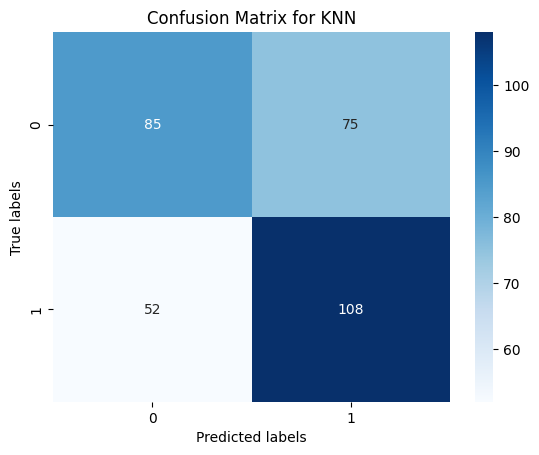

In [32]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_true, y_pred)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for KNN")

# Show the plot
plt.show()

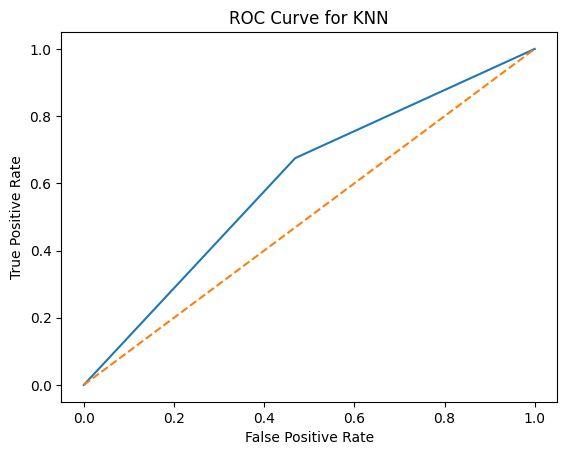

In [33]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.show()

## DECISION TREE

In [35]:
# Initialize an empty list to store cross-validation scores
scores = []
y_pred=[]
y_preds=[]
y_tests=[]
# Iterate over the splits of the data and train/test the model
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the decision tree classifier
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    
    # Evaluate the model's performance on the test set for this fold and store the score
    y_pred = dt.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("Accuracy-Decision tree: %0.2f (+/- %0.2f)" % (mean_score, std_dev * 2))

Accuracy-Decision tree: 0.77 (+/- 0.16)


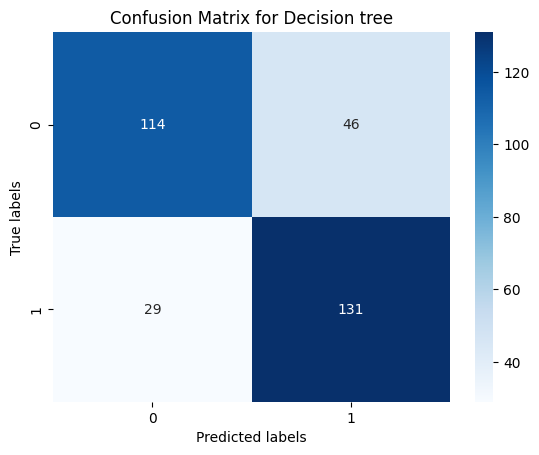

In [36]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_tests, y_preds)
np.set_printoptions(precision=3, suppress=True)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues",fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision tree")

# Show the plot
plt.show()

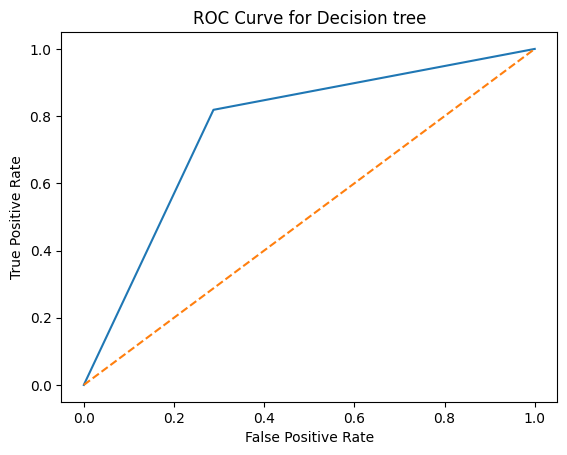

In [37]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_tests, y_preds)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision tree')
plt.show()

## LOGISTIC REGRESSION

In [58]:
# Perform 10-fold cross validation using KFold method
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr = LogisticRegression(C=1)
scores = []
y_preds = []
y_true = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_preds.extend(y_pred)
    y_true.extend(y_test)
    scores.append(lr.score(X_test, y_test))

# Calculate and print the cross-validation accuracy
print("Accuracy- Logistic Regression: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Accuracy- Logistic Regression: 0.65 (+/- 0.13)


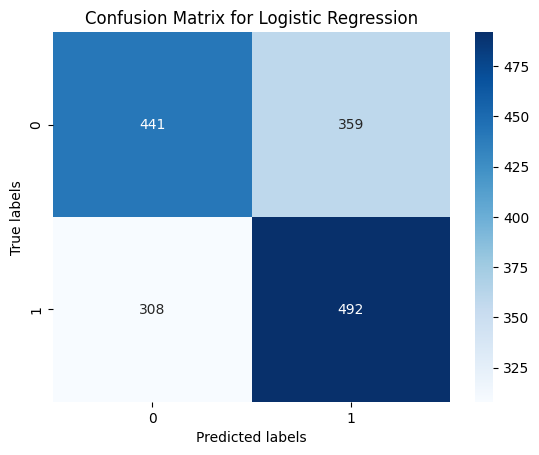

In [64]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_true, y_preds)
np.set_printoptions(precision=3, suppress=True)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues",fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Logistic Regression")

# Show the plot
plt.show()

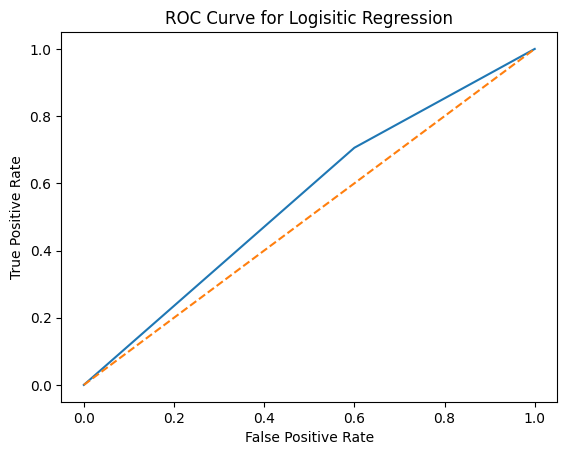

In [65]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logisitic Regression')
plt.show()

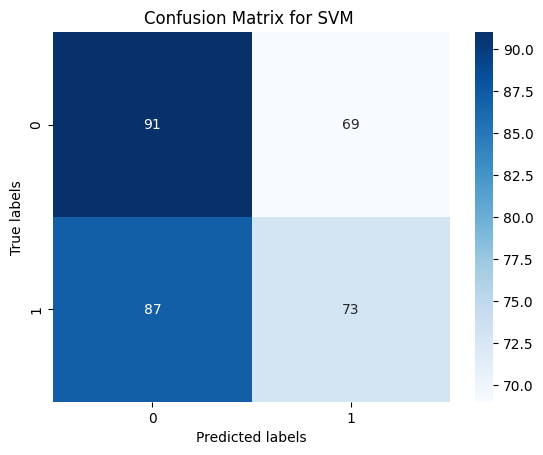

In [44]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_true, y_preds)
np.set_printoptions(precision=3, suppress=True)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues",fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for SVM ")

# Show the plot
plt.show()

## SVM

In [66]:
y_pred=[]
y_preds=[]
y_true=[]
# Define the desired sample size for the reduced dataset
sample_size = 5000

# Initialize SVM classifier with default hyperparameters
svm = SVC()

# Use stratified k-fold cross-validation to evaluate classifier performance
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = []

# Loop over each fold and perform stratified sampling on the training set
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Use stratified sampling to select the desired number of samples from each class
    X_sampled, y_sampled = resample(X_train, y_train, n_samples=sample_size, stratify=y_train, random_state=42)

    # Fit SVM classifier on the reduced dataset and evaluate performance on the test set
    svm.fit(X_sampled, y_sampled)
    y_pred = svm.predict(X_test)
    y_preds.extend(y_pred)
    y_true.extend(y_test)
    scores.append(svm.score(X_test,y_test))

# Print the average classification accuracy over all folds
print("Accuracy- SVM: {:.2f}".format(sum(scores)/len(scores)))



Accuracy- SVM: 0.51


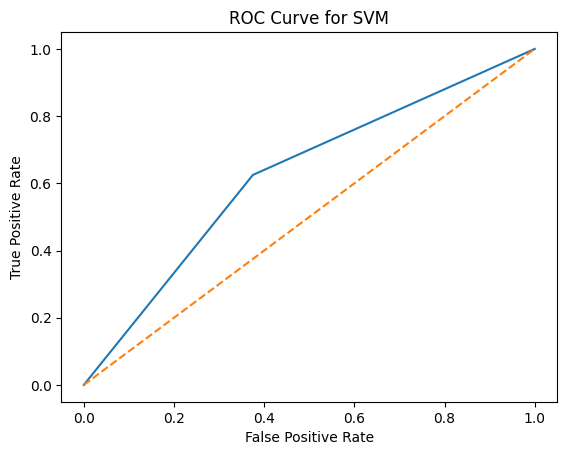

In [45]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.show()

## ENSEMBLE METHODS

### VOTING ENSEMBLE

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_preds = []
y_tests = []

# Train the models and ensemble them
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(C=1)
ensemble = VotingClassifier(estimators=[('rf', rf), ('dt', dt), ('lr', lr)], voting='hard')

# Loop over the splits of the data and train/test the models
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the models to the training data for this fold
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    lr.fit(X_train, y_train)

    # Fit the ensemble model to the training data for this fold
    ensemble.fit(X_train, y_train)

    # Evaluate the performance of the ensemble model on the test set for this fold
    y_pred = ensemble.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("Ensemble accuracy: %0.4f (+/- %0.2f)" % (mean_score, std_dev * 2))


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Ensemble accuracy: 0.8125 (+/- 0.13)


### ADA BOOST

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Set up KFold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_preds = []
y_tests = []

# Train the models and ensemble them
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(estimator=dt, n_estimators=100)

# Loop over the splits of the data and train/test the models
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the models to the training data for this fold
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    ada.fit(X_train, y_train)

    # Combine the models into a voting classifier
    ensemble = VotingClassifier(estimators=[('rf', rf), ('ada', ada)], voting='hard')
    
    # Fit the ensemble model to the training data for this fold
    ensemble.fit(X_train, y_train)

    # Evaluate the performance of the ensemble model on the test set for this fold
    y_pred = ensemble.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("AdaBoost Ensemble accuracy: %0.4f (+/- %0.2f)" % (mean_score, std_dev * 2))

AdaBoost Ensemble accuracy: 0.7469 (+/- 0.03)


### STACKING

In [26]:
pip install xgboost



     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB 1.3 MB/s eta 0:00:56
     ---------------------------------------- 0.0/70.9 MB 1.3 MB/s eta 0:00:56
     --------------------------------------- 0.1/70.9 MB 744.7 kB/s eta 0:01:36
     --------------------------------------- 0.1/70.9 MB 798.9 kB/s eta 0:01:29
     ---------------------------------------- 0.2/70.9 MB 1.3 MB/s eta 0:00:57
     ---------------------------------------- 0.3/70.9 MB 1.2 MB/s eta 0:00:59
     ---------------------------------------- 0.5/70.9 MB 1.9 MB/s eta 0:00:38
     ---------------------------------------- 0.5/70.9 MB 1.8 MB/s eta 0:00:40
      --------------------------------------- 1.0/70.9 MB 2.9 MB/s eta 0:00:25
      --------------------------------------- 1.0/70.9 MB 2.8 MB/s eta 0:00:25
      --------------------------------------- 1.6/70.9 MB 3.9 MB/s eta 0:00:18
     - -------------------------------------- 2.1/70.9 M


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifiers
base_classifier1 = DecisionTreeClassifier()
base_classifier2 = RandomForestClassifier(n_estimators=100)
base_classifier3 = XGBClassifier()

# Initialize the stacking classifier
estimators = [('dt', base_classifier1), ('rf', base_classifier2), ('xgb', base_classifier3)]


kf = KFold(n_splits=10, random_state=42, shuffle=True)
accuracy_scores = []
scores = []
y_preds = []
y_tests = []
accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    stacking.fit(X_train, y_train)
    y_pred = stacking.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("Stacking Ensemble accuracy: %0.4f (+/- %0.2f)" % (mean_score, std_dev * 2))


Stacking Ensemble accuracy: 0.8063 (+/- 0.09)


### XG boosting

In [33]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Initialize the XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Assuming it's a binary classification problem
    'eval_metric': 'error',  # Use 'error' as the evaluation metric
    'seed': 42
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert the data into DMatrix format for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Train the XGBoost model
    num_rounds = 100  # Number of boosting rounds
    model = xgb.train(params, dtrain, num_rounds)

    # Make predictions on the testing data
    y_pred = model.predict(dtest)
    y_pred_labels = [round(value) for value in y_pred]  # Convert probabilities to class labels

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_labels)
    accuracies.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracies) / len(accuracies)
print("XG boosting Accuracy:", average_accuracy)


XG boosting Accuracy: 0.775


### BAGGING

In [34]:
# Bagging ensemble method with Decision tree as base classifier
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Initialize the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier()

# Initialize the number of folds for cross-validation
n_splits = 10

# Initialize the KFold cross-validator
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []
scores = []
y_preds = []
y_tests = []
# Perform 10-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Bagging Classifier
    bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
    
    # Train the model on the training data
    bagging.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = bagging.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("Bagging Ensemble accuracy: %0.4f (+/- %0.2f)" % (mean_score, std_dev * 2))


Bagging Ensemble accuracy: 0.7781 (+/- 0.17)


In [19]:
# Bagging ensemble method with Decision tree as base classifier
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Initialize the base classifier (Decision Tree)
base_classifier = RandomForestClassifier(n_estimators=100)

# Initialize the number of folds for cross-validation
n_splits = 10

# Initialize the KFold cross-validator
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []
scores = []
y_preds = []
y_tests = []
# Perform 10-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Bagging Classifier
    bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
    
    # Train the model on the training data
    bagging.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = bagging.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("Bagging Ensemble accuracy: %0.4f (+/- %0.2f)" % (mean_score, std_dev * 2))


Bagging Ensemble accuracy: 0.7844 (+/- 0.10)
